# XGBoost

## Learning objectives
- Understand
    - gradient boosting algorithms
- implement gradient boosting
- implement XGBoost

## Intro - Feedback loops
In the real world, lots of classical control systems depend on feedback loops. 
Feedback loops work by repeatedly taking a measurement, and then taking an action to push the value measured towards the desired value. 
Boosting kind of implements this for machine learning models by having a sequence of models whose outputs are added together, where the next model is trained to correct the error of the one before.

## Gradient boosting

We will start off by looking at gradient boosting for regression.
For this, we will need a dataset with continuous features and a differentiable loss function.

Gradient boosting produces a sequence of models, each of which predicts the difference between the previous model's prediction and the ideal output. The models' predictions are weighted by a learning rate and then summed together to produce a final output.

Gradient boosting starts by outputting a prediction for all values using a single leaf, that is, by predicting the same constant value, $c$, for all of them.

## $H_1(x) = c$

But what is the value of $c$? 
Let's minimise our mean squared error objective to solve this.

## $c = argmin_c \ MSE(H_1(X), Y) = argmin_w \frac{1}{m} \Sigma^m_{i=1} (H_1(x_i) - y_i)^2$

This can be found by calculating the gradient of the MSE loss above and setting to zero.
## $\frac{\partial L}{\partial c} = \frac{2}{m} \Sigma^m_{i=1} (H_1(x_i) - y_i)$
## $0 = \frac{2}{m} \Sigma^m_{i=1} (H_1(x_i) - y_i)$
## $c = \frac{1}{m} \Sigma^m_{i=1} y_i$
The solution to the minimisation above is the mean of all of the labels.
## $H_1(x_i) = \frac{1}{m} \Sigma^m_i y_i$

Gradient boosting then sequentially uses other trees to make a prediction of the amount and direction by which the prediction made by the previous tree needs to be shifted to reduce the loss.
The adjustment needed to be made for each example depends on the error resulting from the latest prediction. 
For the $l$th tree, this error is given by 

$H_l(x) - y$. 

If the error is positive, then our estimate is too high, and we need to push it in the negative direction.
And vice versa.
This sounds a bit like gradient descent right?
In fact, it is implemented in almost the same way.

This is where the name gradient boosting comes from: each sequential model boosts the predictions of the previous one by adjusting it's prediction in a direction that reduces the error, by following the gradient of the loss with respect to the most recent prediction downhill.

The difference between gradient descent for optimisation and gradient boosting is that this shifting process does not update the model parameters, but updates the prediction, and it is not done whilst training, but is done whilst making predictions.

We calculate the update that needs to be made to the prediction 

Another way to look at the error is that it is the negative of what extra needs to be added to the prediction.
This difference is known as the residual.

When we use the half MSE loss function, it's derivative gives us the residual exactly.
When using other loss functions though, such as the MSE loss for simplicity, or the cross entropy loss for classification, the derivative which gives us the update to make to the predictions is not equal to the residual.
In this case, we call the update quantities **pseudo residuals**.


Then we build a tree based on the predictions from the first leaf.
This is similar to AdaBoost in the sense that we are going to combine the predictions of successive models.
What is different however, is that this second tree predicts the **residual**, rather than also predicting the same the label.
The residual is the difference between the label and the prediction.
## Residual, $r_{il} = H_l(x_i) - y_i$
We then take a weighted contribution of the trees' outputs.

## How is each tree's contribution weighted?

Gradient boost scales the contribution of each successive tree by a learning rate 
# to prevent overfitting?
As we've seen before, the learning rate $alpha$ is a value between zero and 1.

## learning_rate, $\alpha \in [0, 1]$

When we did gradient based optimisation earlier, 

You can imagine gradient boosting like another ensemble method, where each tree nudges the predictions towards the label by adding the models' outputs rather than avaeraging them.

Each successive model predicts the residuals that remain from the addition of all of the previous models' predictions.

By adding more trees, 
This reduces the bias in the model.
However, it also increases the variance as there becomes more model parameters overall, and hence more possible suitable parameterisations.



We can restrict the size of these trees by either specifying the maximum depth of the tree of the maximum number of leaves.

## Mathematical approach

##
## $r_{il} = - [\frac{\partial L(H(x_i), y_i)}{\partial H(x_i)}]_{H(x)=H_{l-1}(x)}$ 

(20, 1) (20, 1)


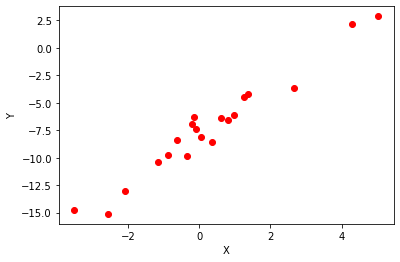

In [1]:
from utils import get_regression_data, show_regression_data, visualise_regression_predictions

X, Y = get_regression_data()
show_regression_data(X, Y)

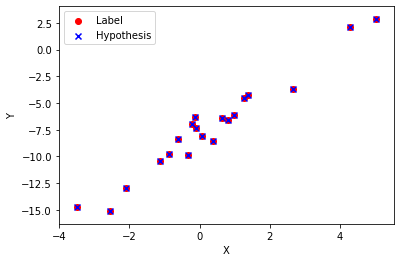

7.888609052210118e-30

In [11]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np

class GradientBoostedDecisionTree:
    def __init__(self, n_trees=100, learning_rate=1):
        self.n_trees = n_trees
        self.learning_rate = learning_rate

    def calc_loss(self, predictions, labels):
        return 0.5 * np.sum((predictions - labels)**2)

    def calc_loss_gradient(self, predictions, labels):
        # print('labels:', labels.shape)
        # print('predictions:', predictions.shape)
        # print((labels - predictions).shape)
        return labels - predictions # in the case of MSE loss the gradient is equal to the residual

    def fit(self, X, Y):
        labels = Y
        self.trees = []
        losses = []
        for tree_idx in range(self.n_trees):
            # print(f'training tree {tree_idx}')
            tree = DecisionTreeRegressor(max_depth=3)
            tree.fit(X, labels)
            predictions = tree.predict(X)
            predictions = predictions.reshape(-1, 1)
            labels = self.calc_loss_gradient(predictions, labels) # calculate residual
            self.trees.append(tree)
            # print()

    def predict(self, X):
        predictions = np.zeros((len(X), 1))
        for tree in self.trees:
            predictions += self.learning_rate * tree.predict(X).reshape(-1, 1)
        
        return predictions

gradientBoostedDecisionTree = GradientBoostedDecisionTree()
gradientBoostedDecisionTree.fit(X, Y)
predictions = gradientBoostedDecisionTree.predict(X)
visualise_regression_predictions(X, predictions, Y)
gradientBoostedDecisionTree.calc_loss(predictions, Y)